 # Impact of Telecom Services on Customer Churn Behavior

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing Blanks with 0 as tenure was 0

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ",0)

In [6]:
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

0

In [11]:
df['customerID'].duplicated().sum()

0

#Converting 0 and 1 values of SeniorCitizen to yes/no to make it easier to understand

In [12]:
def Gender(x):
    if x==0:
        return "No"
    else:
        return "Yes"

df['SeniorCitizen']=df['SeniorCitizen'].apply(Gender)

In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


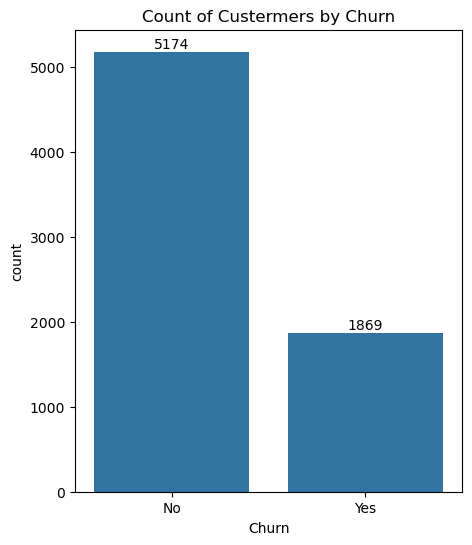

In [33]:
plt.figure(figsize=(5,6))
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Custermers by Churn")
plt.show()

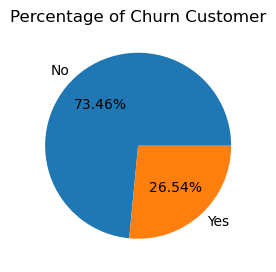

In [15]:
gb = df.groupby('Churn').agg({'Churn':"count"})
plt.figure(figsize=(3,4))
plt.title("Percentage of Churn Customer")
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.show()


From PIE Chart we can conclude that 26.54% of our customres have churned out

##### Now we will explore the reason behind Churning

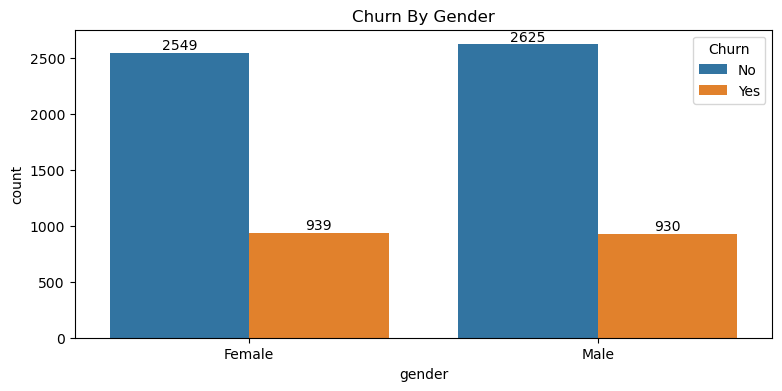

In [38]:
plt.figure(figsize=(9,4))
plt.title("Churn By Gender")
ax=sns.countplot(x="gender",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

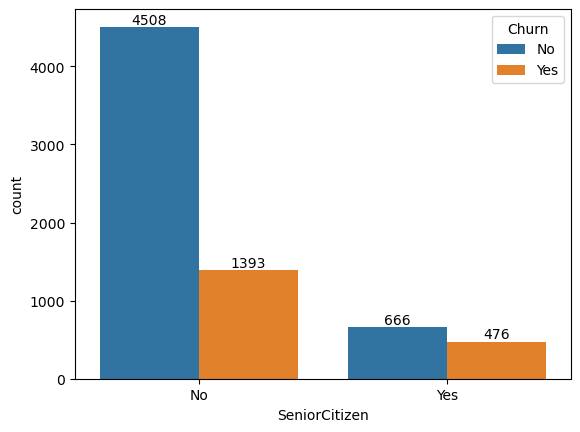

In [24]:
ax=sns.countplot(x='SeniorCitizen',data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

#BY comparing we can conclude that more number of Senior Citizensa had Churned Out

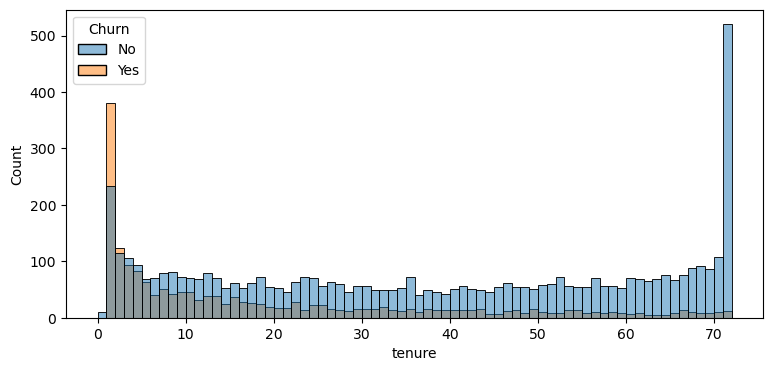

In [18]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()

People who have used our service for a long time have stayed but people who have use or service only for 1 month have Churned out

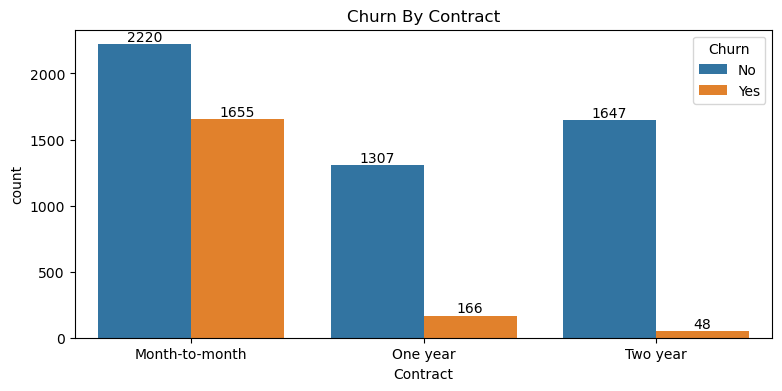

In [39]:
plt.figure(figsize=(9,4))
plt.title("Churn By Contract")
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

People who have Month-to-Month contract are likely to churn more comparitively One or Two year contract

In [20]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

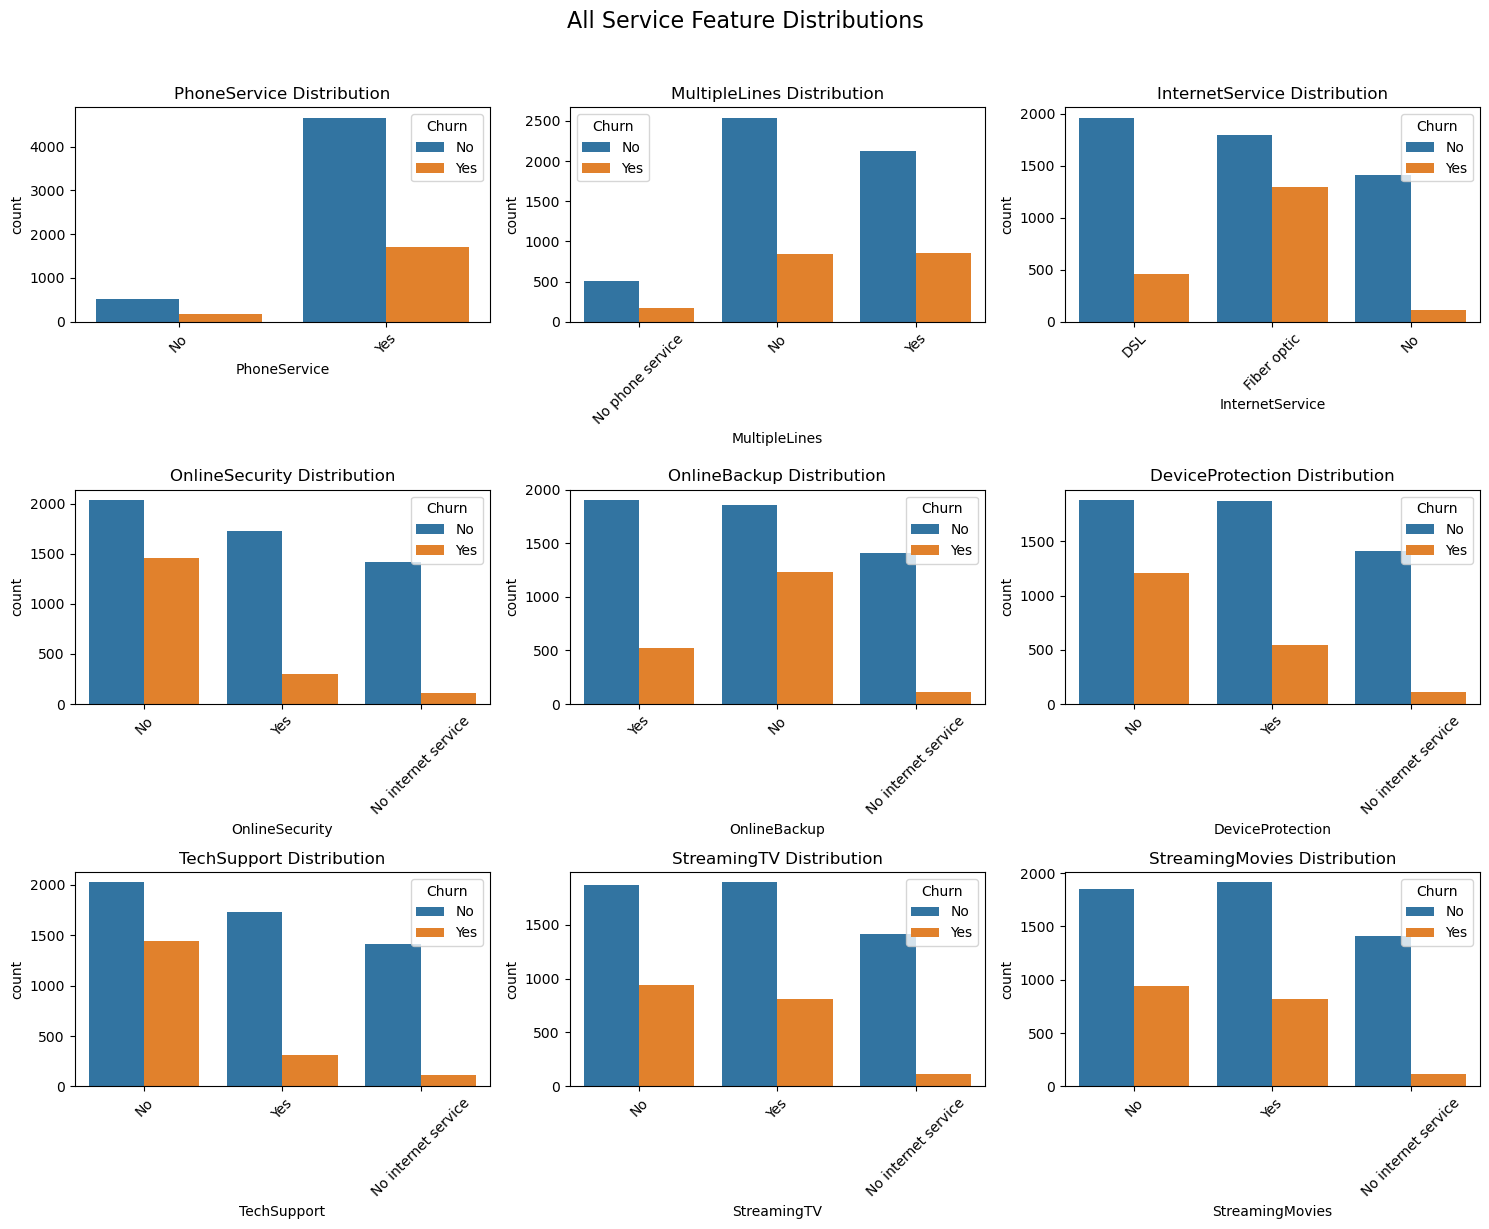

In [48]:
columns_to_plot = ['PhoneService', 'MultipleLines', 'InternetService', 
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 3
n_rows = 3 

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle("All Service Feature Distributions", fontsize=16,y=1.02)
ax = ax.flatten()
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=ax[i], hue=df['Churn'])
    ax[i].set_title(f'{column} Distribution')
    ax[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


Customers without OnlineSecurity, TechSupport, and DeviceProtection show noticeably higher churn rates, indicating a lack of support or protection leads to dissatisfaction.
DSL and Fiber optic users have more churn compared to those with no internet service, possibly due to service quality or pricing issues.
Services like StreamingTV and StreamingMovies also show higher churn among users, suggesting these may not add enough value to retain customers.
In contrast, PhoneService users have relatively lower churn, implying it may be a more stable and essential service

In [22]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


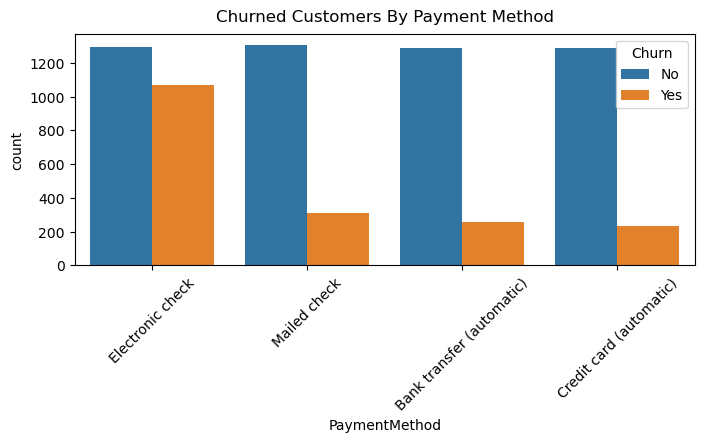

In [23]:
plt.figure(figsize=(8,3))
plt.title("Churned Customers By Payment Method",y=1.02)
sns.countplot(x='PaymentMethod',data=df,hue='Churn')
plt.tick_params(axis='x',rotation=45)
plt.show()

#Payment via Electronic Check is showing Higher Churned Rate

##### Conclusion: The analysis reveals that customers who lack essential support and security services such as OnlineSecurity, TechSupport, and DeviceProtection are more likely to churn. Additionally, high churn among Fiber optic and Streaming service users suggests dissatisfaction with quality or perceived value. Conversely, core services like PhoneService show lower churn, indicating their importance in customer retention. Enhancing support services and addressing performance issues in internet and streaming offerings can help reduce churn significantly.

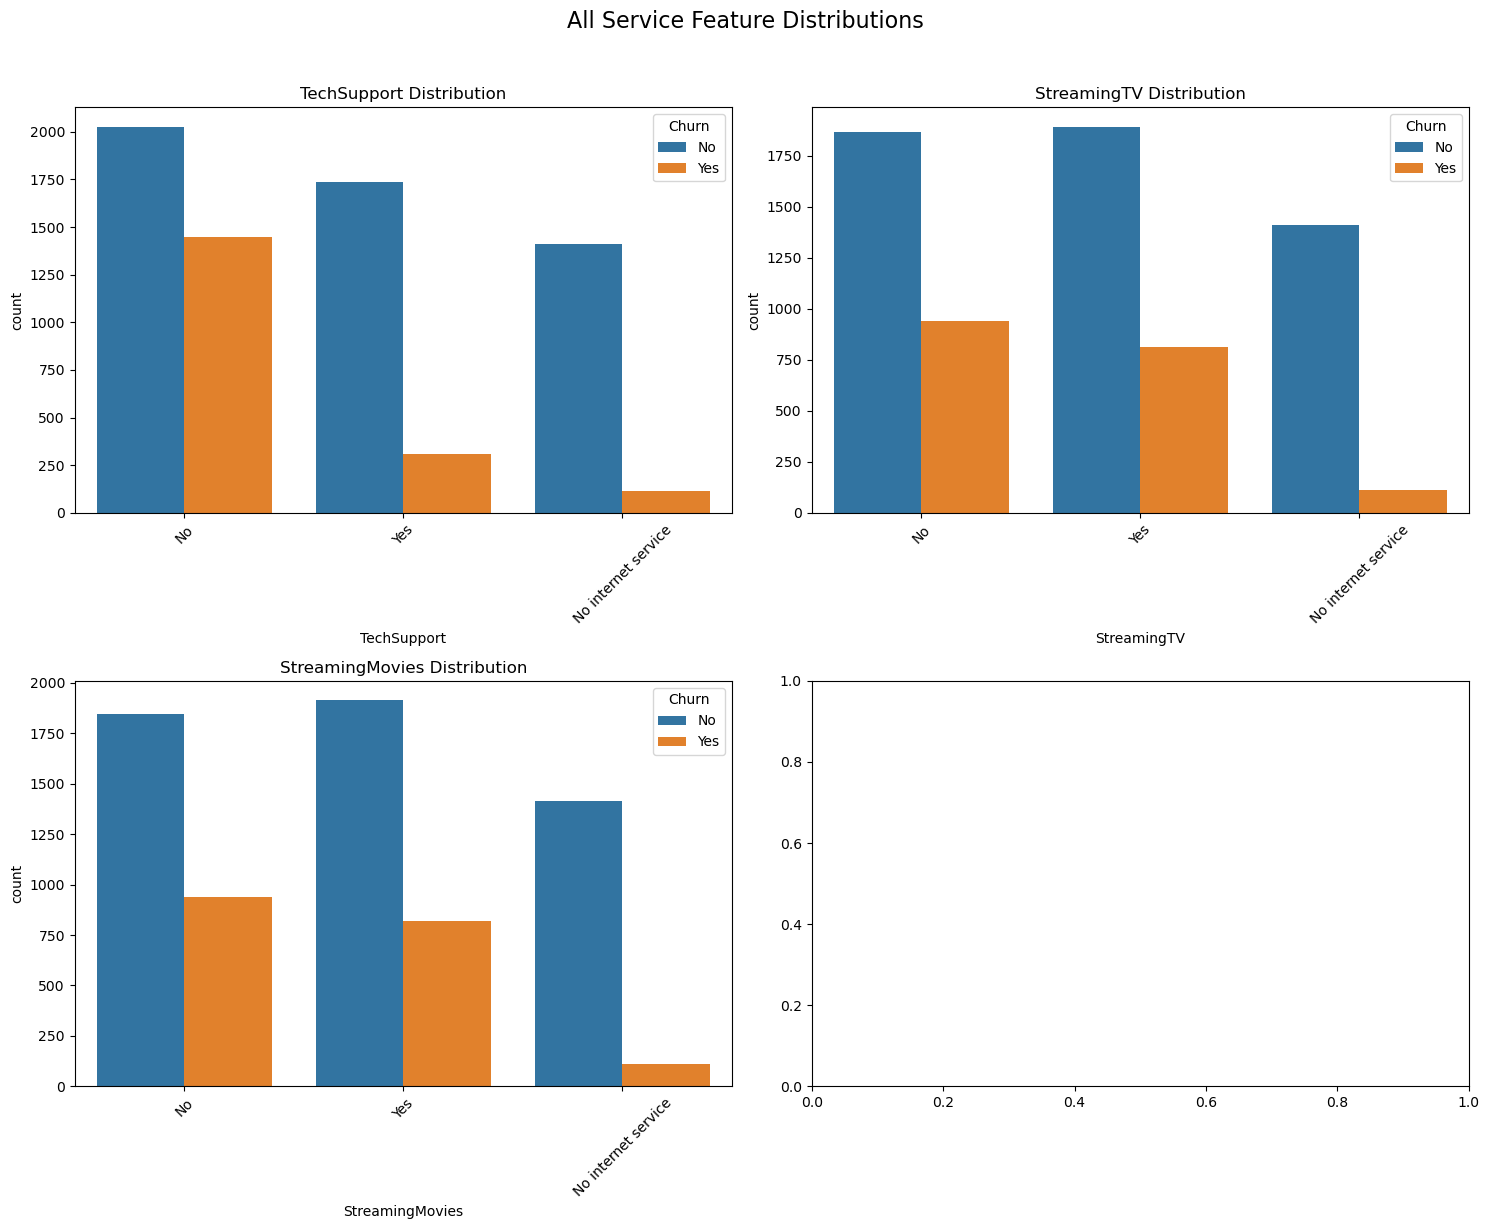

In [41]:
columns_to_plot = ['TechSupport', 'StreamingTV', 'StreamingMovies']
n_cols = 2
n_rows = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 12))
fig.suptitle("All Service Feature Distributions", fontsize=16,y=1.02)
ax = ax.flatten()
for i, column in enumerate(columns_to_plot):
    sns.countplot(x=column, data=df, ax=ax[i], hue=df['Churn'])
    ax[i].set_title(f'{column} Distribution')
    ax[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
